 Key Questions to Ask Before Analysis:
1. What is the size and structure of the dataset?
2. What types of variables are present?
3. Are there missing values or duplicates?
4. What features are correlated with the target?
5. Are there any obvious outliers or anomalies?

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            1498

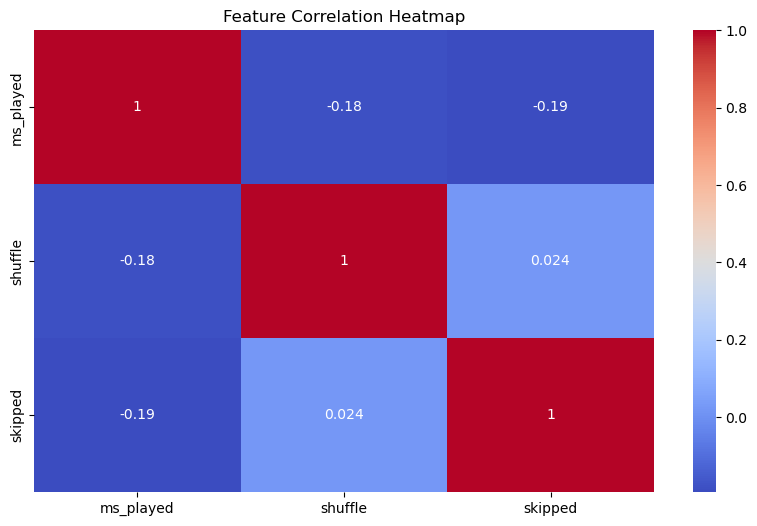

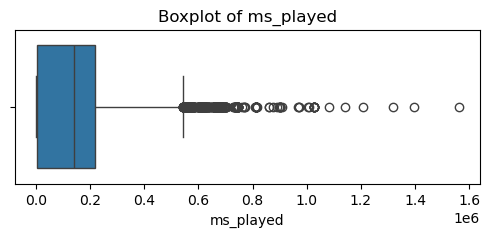


 Number of Outliers in Each Column:
811

 Hypothesis Test on 'ms_played':
p-value = 1.0
 No significant difference (fail to reject null hypothesis).


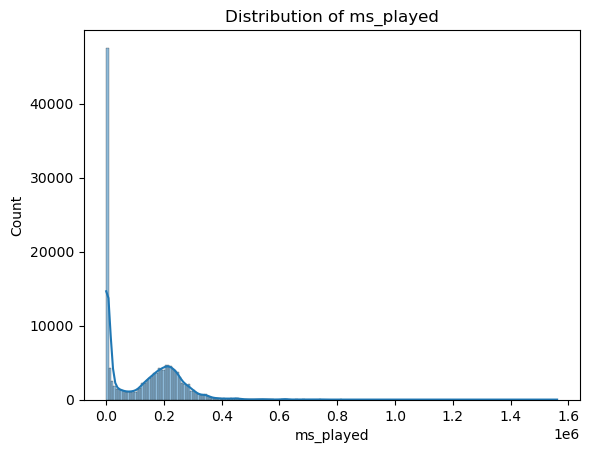

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, zscore
df = pd.read_csv("C:/Users/Ramani/Documents/spotify_history.csv")
print(" Key Questions to Ask Before Analysis:")
questions = [
    "1. What is the size and structure of the dataset?",
    "2. What types of variables are present?",
    "3. Are there missing values or duplicates?",
    "4. What features are correlated with the target?",
    "5. Are there any obvious outliers or anomalies?",
]
for q in questions:
    print(q)
print("\n Dataset Info:")
print(df.info())
print("\n First 5 rows of the dataset:")
print(df.head())
print("\n Summary Statistics:")
print(df.describe(include='all'))
print("\n Correlation Matrix (Numerical features):")
correlation = df.corr(numeric_only=True)
print(correlation)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum()
print("\n Number of Outliers in Each Column:")
print(outliers)
target_col = numeric_cols[0]  # You can change this
print(f"\n Hypothesis Test on '{target_col}':")
stat, p_value = ttest_1samp(df[target_col].dropna(), df[target_col].mean())
print(f"p-value = {p_value}")
if p_value < 0.05:
    print(" Significant difference found (reject null hypothesis).")
else:
    print(" No significant difference (fail to reject null hypothesis).")

# Histogram and distribution plot
sns.histplot(df[target_col], kde=True)
plt.title(f'Distribution of {target_col}')
plt.show()